COVID-19 Exploratory Data Analysis
------------------------------------------

Exploring global trends and country-wise statistics. After cleaning and aggregating the data, we calculated maximum infection rates for each country. The analysis also identifies hotspots and delves into temporal patterns of infection rates.

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print("Module imported successfully")

Module imported successfully


### Importing dataset 

In [3]:
file_path = r"D:/Projects/DataAnalysis_Projects/Covid19_Exploratory_Data_Analysis/Covid19_Exploratory_Data_Analysis/Datasets/Covid19_Confirmed_Cases_Countrywise.csv"
corona_dataset_csv = pd.read_csv(file_path)
print(corona_dataset_csv.head(3))

  Province/State Country/Region  latitude  longitude  2020-01-22  2020-01-23  \
0            NaN    Afghanistan   33.0000    65.0000           0           0   
1            NaN        Albania   41.1533    20.1683           0           0   
2            NaN        Algeria   28.0339     1.6596           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2020-04-21  \
0           0           0           0           0  ...        1092   
1           0           0           0           0  ...         609   
2           0           0           0           0  ...        2811   

   2020-04-22  2020-04-23  2020-04-24  2020-04-25  2020-04-26  2020-04-27  \
0        1176        1279        1351        1463        1531        1703   
1         634         663         678         712         726         736   
2        2910        3007        3127        3256        3382        3517   

   2020-04-28  2020-04-29  2020-04-30  
0        1828        1939        2171  
1        

In [4]:
corona_dataset_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 2020-04-30
dtypes: float64(2), int64(100), object(2)
memory usage: 216.3+ KB


In [5]:
corona_dataset_csv.describe()

latitude   longitude  2020-01-22  2020-01-23  2020-01-24  2020-01-25  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.259359   22.432499    2.086466    2.458647    3.537594    5.390977   
std     24.747943   70.478908   27.279200   27.377862   34.083035   47.434934   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.907750  -18.093125    0.000000    0.000000    0.000000    0.000000   
50%     23.488100   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.191525    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

        2020-01-26   2020-01-27   2020-01-28   2020-01-29  ...     2020-04-21  \
count   266.000000   266.000000   266.000000   266.000000  ...     266.000000   
mean      7.962406    11.003759    20.969925    23.180451  ...    9582.033835   
std      66.289178    89.313757   219.187744   220.524977  ...   55192.088929   
min       0.000000     0.000000     0.000000     0.000000  ...       0.000000   
25%       0.000000     0.000000     0.000000     0.000000  ...      58.000000   
50%       0.000000     0.000000     0.000000     0.000000  ...     339.000000   
75%       0.000000     0.000000     0.000000     0.000000  ...    1712.500000   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  811865.000000   

          2020-04-22     2020-04-23     2020-04-24     2020-04-25  \
count     266.000000     266.000000     266.000000     266.000000   
mean     9865.063910   10179.481203   10506.875940   10826.203008   
std     56941.164602   58758.271305   60812.226451   62832.838104   
min         0.000000       0.000000       0.000000       0.000000   
25%        62.250000      67.000000      72.250000      72.250000   
50%       342.500000     372.500000     403.000000     403.000000   
75%      1767.750000    1781.250000    1800.500000    1894.250000   
max    840351.000000  869170.000000  905358.000000  938154.000000   

          2020-04-26     2020-04-27    2020-04-28    2020-04-29    2020-04-30  
count     266.000000     266.000000  2.660000e+02  2.660000e+02  2.660000e+02  
mean    11102.887218   11360.176692  1.163550e+04  1.191693e+04  1.224378e+04  
std     64533.887576   65963.984777  6.750782e+04  6.918917e+04  7.102980e+04  
min         0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
25%        74.000000      74.250000  7.500000e+01  7.600000e+01  7.725000e+01  
50%       423.000000     423.500000  4.335000e+02  4.555000e+02  4.665000e+02  
75%      1928.250000    1974.500000  2.020000e+03  2.047250e+03  2.105250e+03  
max    965785.000000  988197.000000  1.012582e+06  1.039909e+06  1.069424e+06  

[8 rows x 102 columns]

### Let's check the shape of the dataframe

In [6]:
corona_dataset_csv.shape

(266, 104)

In [7]:
columns = corona_dataset_csv.columns
columns

Index(['Province/State', 'Country/Region', 'latitude', 'longitude',
       '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27',
       ...
       '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30'],
      dtype='object', length=104)

### Delete the useless columns latitude and longitude

In [8]:
print(corona_dataset_csv.columns)
corona_dataset_csv.drop(["latitude", "longitude"], axis=1, inplace=True)

Index(['Province/State', 'Country/Region', 'latitude', 'longitude',
       '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27',
       ...
       '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30'],
      dtype='object', length=104)


In [9]:
corona_dataset_csv

Province/State         Country/Region  2020-01-22  2020-01-23  2020-01-24  \
0              NaN            Afghanistan           0           0           0   
1              NaN                Albania           0           0           0   
2              NaN                Algeria           0           0           0   
3              NaN                Andorra           0           0           0   
4              NaN                 Angola           0           0           0   
..             ...                    ...         ...         ...         ...   
261            NaN         Western Sahara           0           0           0   
262            NaN  Sao Tome and Principe           0           0           0   
263            NaN                  Yemen           0           0           0   
264            NaN                Comoros           0           0           0   
265            NaN             Tajikistan           0           0           0   

     2020-01-25  2020-01-26  2020-01-27  2020-01-28  2020-01-29  ...  \
0             0           0           0           0           0  ...   
1             0           0           0           0           0  ...   
2             0           0           0           0           0  ...   
3             0           0           0           0           0  ...   
4             0           0           0           0           0  ...   
..          ...         ...         ...         ...         ...  ...   
261           0           0           0           0           0  ...   
262           0           0           0           0           0  ...   
263           0           0           0           0           0  ...   
264           0           0           0           0           0  ...   
265           0           0           0           0           0  ...   

     2020-04-21  2020-04-22  2020-04-23  2020-04-24  2020-04-25  2020-04-26  \
0          1092        1176        1279        1351        1463        1531   
1           609         634         663         678         712         726   
2          2811        2910        3007        3127        3256        3382   
3           717         723         723         731         738         738   
4            24          25          25          25          25          26   
..          ...         ...         ...         ...         ...         ...   
261           6           6           6           6           6           6   
262           4           4           4           4           4           4   
263           1           1           1           1           1           1   
264           0           0           0           0           0           0   
265           0           0           0           0           0           0   

     2020-04-27  2020-04-28  2020-04-29  2020-04-30  
0          1703        1828        1939        2171  
1           736         750         766         773  
2          3517        3649        3848        4006  
3           743         743         743         745  
4            27          27          27          27  
..          ...         ...         ...         ...  
261           6           6           6           6  
262           4           8           8          14  
263           1           1           6           6  
264           0           0           0           1  
265           0           0           0          15  

[266 rows x 102 columns]

### Aggregating the rows by the country

In [10]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum(numeric_only=True)
corona_dataset_aggregated.head()

2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Country/Region                                                               
Afghanistan              0           0           0           0           0   
Albania                  0           0           0           0           0   
Algeria                  0           0           0           0           0   
Andorra                  0           0           0           0           0   
Angola                   0           0           0           0           0   

                2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  \
Country/Region                                                               
Afghanistan              0           0           0           0           0   
Albania                  0           0           0           0           0   
Algeria                  0           0           0           0           0   
Andorra                  0           0           0           0           0   
Angola                   0           0           0           0           0   

                ...  2020-04-21  2020-04-22  2020-04-23  2020-04-24  \
Country/Region  ...                                                   
Afghanistan     ...        1092        1176        1279        1351   
Albania         ...         609         634         663         678   
Algeria         ...        2811        2910        3007        3127   
Andorra         ...         717         723         723         731   
Angola          ...          24          25          25          25   

                2020-04-25  2020-04-26  2020-04-27  2020-04-28  2020-04-29  \
Country/Region                                                               
Afghanistan           1463        1531        1703        1828        1939   
Albania                712         726         736         750         766   
Algeria               3256        3382        3517        3649        3848   
Andorra                738         738         743         743         743   
Angola                  25          26          27          27          27   

                2020-04-30  
Country/Region              
Afghanistan           2171  
Albania                773  
Algeria               4006  
Andorra                745  
Angola                  27  

[5 rows x 100 columns]

In [11]:
corona_dataset_aggregated.shape
#we have 187 countries, 100 dates

(187, 100)

In [12]:
corona_dataset_aggregated.loc["China"]
#will return pandas series

2020-01-22      548
2020-01-23      643
2020-01-24      920
2020-01-25     1406
2020-01-26     2075
              ...  
2020-04-26    83912
2020-04-27    83918
2020-04-28    83940
2020-04-29    83944
2020-04-30    83956
Name: China, Length: 100, dtype: int64

### Spread of the virus in China for the first 3 dates only

In [13]:
corona_dataset_aggregated.loc['China'][:3]

2020-01-22    548
2020-01-23    643
2020-01-24    920
Name: China, dtype: int64

### caculating the first derivative of the curve

In [14]:
corona_dataset_aggregated.loc["China"].diff()

2020-01-22      NaN
2020-01-23     95.0
2020-01-24    277.0
2020-01-25    486.0
2020-01-26    669.0
              ...  
2020-04-26      3.0
2020-04-27      6.0
2020-04-28     22.0
2020-04-29      4.0
2020-04-30     12.0
Name: China, Length: 100, dtype: float64

This plot shows us the change in infection rate day by day and what we are looking for is the maximum number.

### maxmimum infection rate for China

In [15]:
corona_dataset_aggregated.loc["China"].diff().max()
#In only 24 hrs, the difference was 15136

15136.0

In [16]:
corona_dataset_aggregated.loc["Italy"].diff().max()
#In only 24 hrs, the difference was 6557

6557.0

In [17]:
corona_dataset_aggregated.loc["Spain"].diff().max()
#In only 24 hrs, the difference was 9630

9630.0

In [18]:
corona_dataset_aggregated.loc["India"].diff().max()
#In only 24 hrs, the difference was 1893

1893.0

###  maximum infection rate for all of the countries. 

In [19]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries:
    max_infection_rate = corona_dataset_aggregated.loc[country].diff().max()
    max_infection_rates.append(max_infection_rate)
    print(f"Country: {country}, Max Infection Rate: {max_infection_rate}")

Country: Afghanistan, Max Infection Rate: 232.0
Country: Albania, Max Infection Rate: 34.0
Country: Algeria, Max Infection Rate: 199.0
Country: Andorra, Max Infection Rate: 43.0
Country: Angola, Max Infection Rate: 5.0
Country: Antigua and Barbuda, Max Infection Rate: 6.0
Country: Argentina, Max Infection Rate: 291.0
Country: Armenia, Max Infection Rate: 134.0
Country: Australia, Max Infection Rate: 497.0
Country: Austria, Max Infection Rate: 1321.0
Country: Azerbaijan, Max Infection Rate: 105.0
Country: Bahamas, Max Infection Rate: 7.0
Country: Bahrain, Max Infection Rate: 301.0
Country: Bangladesh, Max Infection Rate: 641.0
Country: Barbados, Max Infection Rate: 12.0
Country: Belarus, Max Infection Rate: 1485.0
Country: Belgium, Max Infection Rate: 2454.0
Country: Belize, Max Infection Rate: 4.0
Country: Benin, Max Infection Rate: 19.0
Country: Bhutan, Max Infection Rate: 1.0
Country: Bolivia, Max Infection Rate: 104.0
Country: Bosnia and Herzegovina, Max Infection Rate: 92.0
Country

In [20]:
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates
corona_dataset_aggregated.head()

2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Country/Region                                                               
Afghanistan              0           0           0           0           0   
Albania                  0           0           0           0           0   
Algeria                  0           0           0           0           0   
Andorra                  0           0           0           0           0   
Angola                   0           0           0           0           0   

                2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  \
Country/Region                                                               
Afghanistan              0           0           0           0           0   
Albania                  0           0           0           0           0   
Algeria                  0           0           0           0           0   
Andorra                  0           0           0           0           0   
Angola                   0           0           0           0           0   

                ...  2020-04-22  2020-04-23  2020-04-24  2020-04-25  \
Country/Region  ...                                                   
Afghanistan     ...        1176        1279        1351        1463   
Albania         ...         634         663         678         712   
Algeria         ...        2910        3007        3127        3256   
Andorra         ...         723         723         731         738   
Angola          ...          25          25          25          25   

                2020-04-26  2020-04-27  2020-04-28  2020-04-29  2020-04-30  \
Country/Region                                                               
Afghanistan           1531        1703        1828        1939        2171   
Albania                726         736         750         766         773   
Algeria               3382        3517        3649        3848        4006   
Andorra                738         743         743         743         745   
Angola                  26          27          27          27          27   

                max_infection_rates  
Country/Region                       
Afghanistan                   232.0  
Albania                        34.0  
Algeria                       199.0  
Andorra                        43.0  
Angola                          5.0  

[5 rows x 101 columns]

### Data exploration: Handling missing values if necessary

In [21]:
corona_dataset_aggregated.describe()

2020-01-22  2020-01-23  2020-01-24   2020-01-25   2020-01-26  \
count  187.000000  187.000000  187.000000   187.000000   187.000000   
mean     2.967914    3.497326    5.032086     7.668449    11.326203   
std     40.071697   47.017656   67.271230   102.808451   151.725366   
min      0.000000    0.000000    0.000000     0.000000     0.000000   
25%      0.000000    0.000000    0.000000     0.000000     0.000000   
50%      0.000000    0.000000    0.000000     0.000000     0.000000   
75%      0.000000    0.000000    0.000000     0.000000     0.000000   
max    548.000000  643.000000  920.000000  1406.000000  2075.000000   

        2020-01-27   2020-01-28   2020-01-29   2020-01-30   2020-01-31  ...  \
count   187.000000   187.000000   187.000000   187.000000   187.000000  ...   
mean     15.652406    29.828877    32.973262    44.032086    53.085561  ...   
std     210.370186   402.833903   445.097602   595.295516   716.748552  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max    2877.000000  5509.000000  6087.000000  8141.000000  9802.000000  ...   

          2020-04-22     2020-04-23     2020-04-24     2020-04-25  \
count     187.000000     187.000000     187.000000     187.000000   
mean    14032.657754   14479.903743   14945.609626   15399.839572   
std     67699.951451   69854.512469   72292.085088   74690.260370   
min         0.000000       0.000000       0.000000       0.000000   
25%        70.000000      75.000000      79.000000      80.000000   
50%       634.000000     671.000000     681.000000     693.000000   
75%      4242.500000    4422.500000    4785.000000    5070.000000   
max    840351.000000  869170.000000  905358.000000  938154.000000   

          2020-04-26     2020-04-27    2020-04-28    2020-04-29    2020-04-30  \
count     187.000000     187.000000  1.870000e+02  1.870000e+02  1.870000e+02   
mean    15793.411765   16159.395722  1.655103e+04  1.695136e+04  1.741629e+04   
std     76709.121347   78404.913349  8.023629e+04  8.223124e+04  8.441412e+04   
min         0.000000       0.000000  0.000000e+00  0.000000e+00  1.000000e+00   
25%        81.000000      81.000000  8.100000e+01  9.300000e+01  9.750000e+01   
50%       696.000000     710.000000  7.120000e+02  7.290000e+02  7.460000e+02   
75%      5397.500000    5708.500000  5.900000e+03  6.076000e+03  6.254500e+03   
max    965785.000000  988197.000000  1.012582e+06  1.039909e+06  1.069424e+06   

       max_infection_rates  
count           187.000000  
mean           1042.112299  
std            3781.896944  
min               1.000000  
25%              19.000000  
50%              73.000000  
75%             355.500000  
max           36188.000000  

[8 rows x 101 columns]

### Checking Null Values

In [22]:
corona_dataset_aggregated.isnull().sum()

2020-01-22             0
2020-01-23             0
2020-01-24             0
2020-01-25             0
2020-01-26             0
                      ..
2020-04-27             0
2020-04-28             0
2020-04-29             0
2020-04-30             0
max_infection_rates    0
Length: 101, dtype: int64

### Identifying hotspot country
Determine the countries with the highest maximum infection rates.


In [23]:
max_infection_rates = corona_dataset_aggregated['max_infection_rates']
highest_infection_rate_country = corona_dataset_aggregated.loc[max_infection_rates.idxmax()]
highest_infection_rate_country

2020-01-22                   1.0
2020-01-23                   1.0
2020-01-24                   2.0
2020-01-25                   2.0
2020-01-26                   5.0
                         ...    
2020-04-27              988197.0
2020-04-28             1012582.0
2020-04-29             1039909.0
2020-04-30             1069424.0
max_infection_rates      36188.0
Name: US, Length: 101, dtype: float64

### Analyzing the temporal patterns of infection rates for specific countries.

In [24]:
temporal_analysis_india = corona_dataset_aggregated.loc['India']
temporal_analysis_india

2020-01-22                 0.0
2020-01-23                 0.0
2020-01-24                 0.0
2020-01-25                 0.0
2020-01-26                 0.0
                        ...   
2020-04-27             29451.0
2020-04-28             31324.0
2020-04-29             33062.0
2020-04-30             34863.0
max_infection_rates     1893.0
Name: India, Length: 101, dtype: float64

In [25]:
temporal_analysis_china = corona_dataset_aggregated.loc['China']
temporal_analysis_china

2020-01-22               548.0
2020-01-23               643.0
2020-01-24               920.0
2020-01-25              1406.0
2020-01-26              2075.0
                        ...   
2020-04-27             83918.0
2020-04-28             83940.0
2020-04-29             83944.0
2020-04-30             83956.0
max_infection_rates    15136.0
Name: China, Length: 101, dtype: float64

### Identify the date of maximum infection rate for each country


In [26]:
date_of_max_infection = corona_dataset_aggregated.iloc[:, :-1].idxmax(axis=1)
corona_dataset_aggregated['date_of_max_infection'] = date_of_max_infection
date_of_max_infection

Country/Region
Afghanistan           2020-04-30
Albania               2020-04-30
Algeria               2020-04-30
Andorra               2020-04-30
Angola                2020-04-27
                         ...    
West Bank and Gaza    2020-04-24
Western Sahara        2020-04-12
Yemen                 2020-04-29
Zambia                2020-04-30
Zimbabwe              2020-04-30
Length: 187, dtype: object

### Top N Countries with the Highest Infection Rates

In [27]:
# Example: Top 10 countries with the highest maximum infection rates
top_countries = corona_dataset_aggregated.nlargest(5, 'max_infection_rates')
top_countries

2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Country/Region                                                               
US                       1           1           2           2           5   
France                   0           0           2           3           3   
China                  548         643         920        1406        2075   
Ecuador                  0           0           0           0           0   
Spain                    0           0           0           0           0   

                2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  \
Country/Region                                                               
US                       5           5           5           5           7   
France                   3           4           5           5           5   
China                 2877        5509        6087        8141        9802   
Ecuador                  0           0           0           0           0   
Spain                    0           0           0           0           0   

                ...  2020-04-23  2020-04-24  2020-04-25  2020-04-26  \
Country/Region  ...                                                   
US              ...      869170      905358      938154      965785   
France          ...      158303      159952      161644      162220   
China           ...       83884       83899       83909       83912   
Ecuador         ...       11183       22719       22719       22719   
Spain           ...      213024      202990      205905      207634   

                2020-04-27  2020-04-28  2020-04-29  2020-04-30  \
Country/Region                                                   
US                  988197     1012582     1039909     1069424   
France              165963      169053      166543      167299   
China                83918       83940       83944       83956   
Ecuador              23240       24258       24675       24934   
Spain               209465      210773      212917      213435   

                max_infection_rates  date_of_max_infection  
Country/Region                                              
US                          36188.0             2020-04-30  
France                      26849.0             2020-04-28  
China                       15136.0             2020-04-30  
Ecuador                     11536.0             2020-04-30  
Spain                        9630.0             2020-04-30  

[5 rows x 102 columns]

### Checking India's position in terms of maximum infection rate

In [28]:
if 'India' in corona_dataset_aggregated.index:
    india_position = corona_dataset_aggregated['max_infection_rates'].sort_values(ascending=False).index.get_loc('India') + 1
    print(f"India's position in terms of maximum infection rate: {india_position}")
else:
    print("India is not present in the DataFrame.")

India's position in terms of maximum infection rate: 17


### Analyzing the maximum infection rate for India


In [29]:
india_data = corona_dataset_aggregated.loc['India']
max_infection_rate_india = india_data['max_infection_rates']
avg_max_infection_rate_india = max_infection_rate_india.mean()
print(f"Average Maximum Infection Rate in India: {avg_max_infection_rate_india}")

Average Maximum Infection Rate in India: 1893.0


### Importing 2nd dataset

The dataset represents COVID-19 statistics for the Indian states.  It includes information on confirmed cases (Indian and foreign nationals), recoveries, and deaths.

In [30]:
data_2 = pd.read_csv("D:/Projects/DataAnalysis_Projects/Covid19_Exploratory_Data_Analysis/Covid19_Exploratory_Data_Analysis/Datasets/Covid19_Deaths_India_Statewise.csv")
data_2.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [31]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15086 entries, 0 to 15085
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15086 non-null  int64 
 1   Date                      15086 non-null  object
 2   Time                      15086 non-null  object
 3   State/UnionTerritory      15086 non-null  object
 4   ConfirmedIndianNational   15086 non-null  object
 5   ConfirmedForeignNational  15086 non-null  object
 6   Cured                     15086 non-null  int64 
 7   Deaths                    15086 non-null  int64 
 8   Confirmed                 15086 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


In [32]:
data_2.describe()

Sno         Cured        Deaths     Confirmed
count  15086.000000  1.508600e+04  15086.000000  1.508600e+04
mean    7543.500000  1.747937e+05   2721.084449  1.942820e+05
std     4355.097416  3.648330e+05   7182.672358  4.095184e+05
min        1.000000  0.000000e+00      0.000000  0.000000e+00
25%     3772.250000  1.685000e+03     12.000000  2.935500e+03
50%     7543.500000  1.964700e+04    364.000000  2.608150e+04
75%    11314.750000  2.087552e+05   2170.000000  2.216012e+05
max    15086.000000  4.927480e+06  83777.000000  5.433506e+06

In [33]:
data_2.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace = True, axis = 1)

In [34]:
data_2.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed
0  2020-01-30               Kerala      0       0          1
1  2020-01-31               Kerala      0       0          1
2  2020-02-01               Kerala      0       0          2
3  2020-02-02               Kerala      0       0          3
4  2020-02-03               Kerala      0       0          3

### Changing the date formate in standardized format - YYYY-MM-DD


In [35]:
data_2['Date'] = pd.to_datetime(data_2['Date'], format='%Y-%m-%d')
data_2.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed
0 2020-01-30               Kerala      0       0          1
1 2020-01-31               Kerala      0       0          1
2 2020-02-01               Kerala      0       0          2
3 2020-02-02               Kerala      0       0          3
4 2020-02-03               Kerala      0       0          3

### Active Cases
Calculates and adds a new column, 'Active_Cases,' to the data_2 DataFrame.

In [36]:
data_2['Active_Cases'] = data_2['Confirmed'] - (data_2['Cured'] + data_2['Deaths'])
data_2.tail()

Date State/UnionTerritory    Cured  Deaths  Confirmed  \
15081 2021-05-19            Telangana   485644    3012     536766   
15082 2021-05-19              Tripura    36402     450      42776   
15083 2021-05-19          Uttarakhand   214426    5132     295790   
15084 2021-05-19        Uttar Pradesh  1483249   18072    1637663   
15085 2021-05-19          West Bengal  1026492   13576    1171861   

       Active_Cases  
15081         48110  
15082          5924  
15083         76232  
15084        136342  
15085        131793

### Pivot Table
Showcasing maximum confirmed, deaths, and cured values using pivot_table().

In [37]:
statewise = pd.pivot_table(data_2, values=["Confirmed", "Deaths", "Cured"], index="State/UnionTerritory", aggfunc=max)
statewise.head()

Confirmed    Cured  Deaths
State/UnionTerritory                                   
Andaman and Nicobar Islands       6674     6359      92
Andhra Pradesh                 1475372  1254291    9580
Arunachal Pradesh                22462    19977      88
Assam                           340858   290774    2344
Bihar                           664115   595377    4039

### Recovery Rate & Mortality Rate

In [38]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [39]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [40]:
statewise = statewise.sort_values(by = "Confirmed", ascending = False)

In [41]:
statewise.style.background_gradient(cmap = "cubehelix")

### Top 10 Active Cases States

In [42]:
top_10_active_cases = data_2.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', "Date"]].sort_values(by = ["Active_Cases"], ascending = False).reset_index()

In [43]:
fig = plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in india')

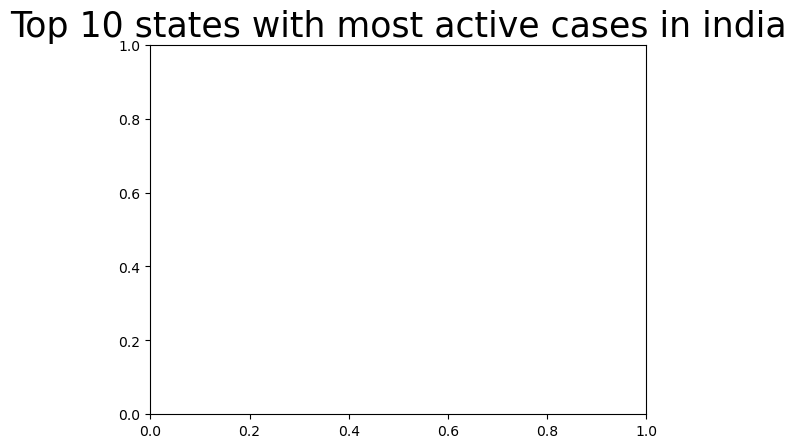

In [44]:
plt.title("Top 10 states with most active cases in india", size = 25)

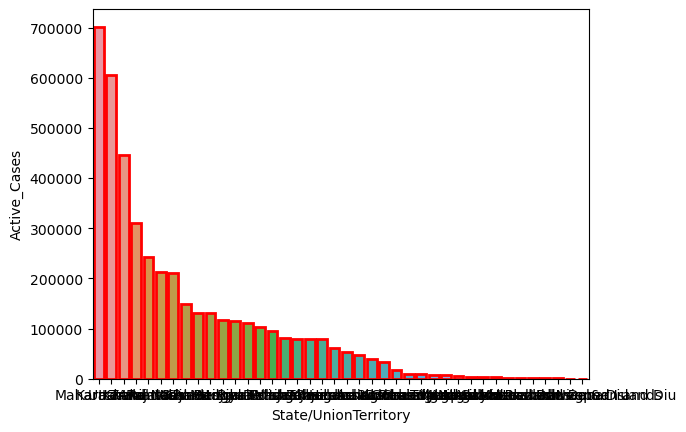

In [45]:
ax = sns.barplot(data=top_10_active_cases, y="Active_Cases", x="State/UnionTerritory", linewidth=2, edgecolor="red")

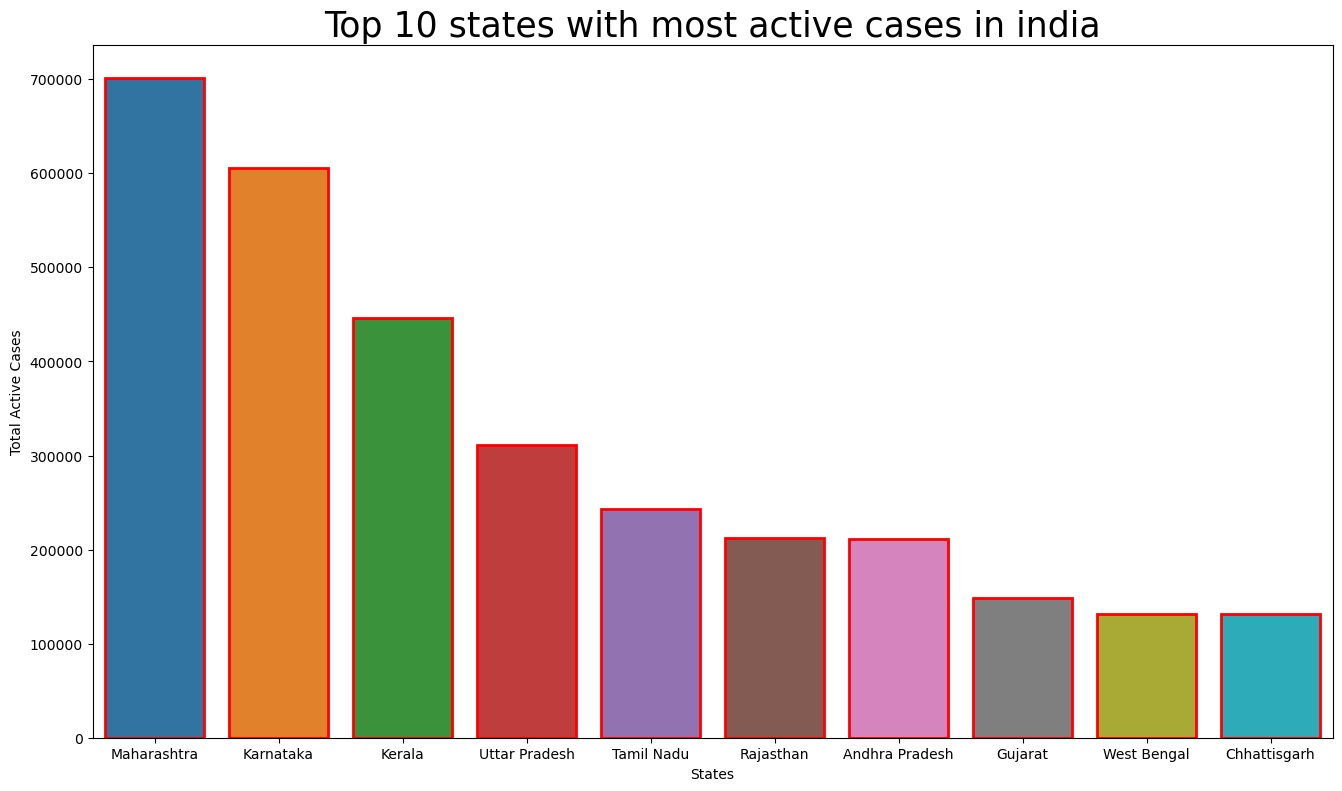

In [46]:
top_10_active_cases = data_2.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', "Date"]].sort_values(by = ["Active_Cases"], ascending = False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in india", size = 25)
ax = sns.barplot(data=top_10_active_cases.iloc[:10], y="Active_Cases", x="State/UnionTerritory", linewidth=2, edgecolor="red")
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

### Top 10 states with highest deaths

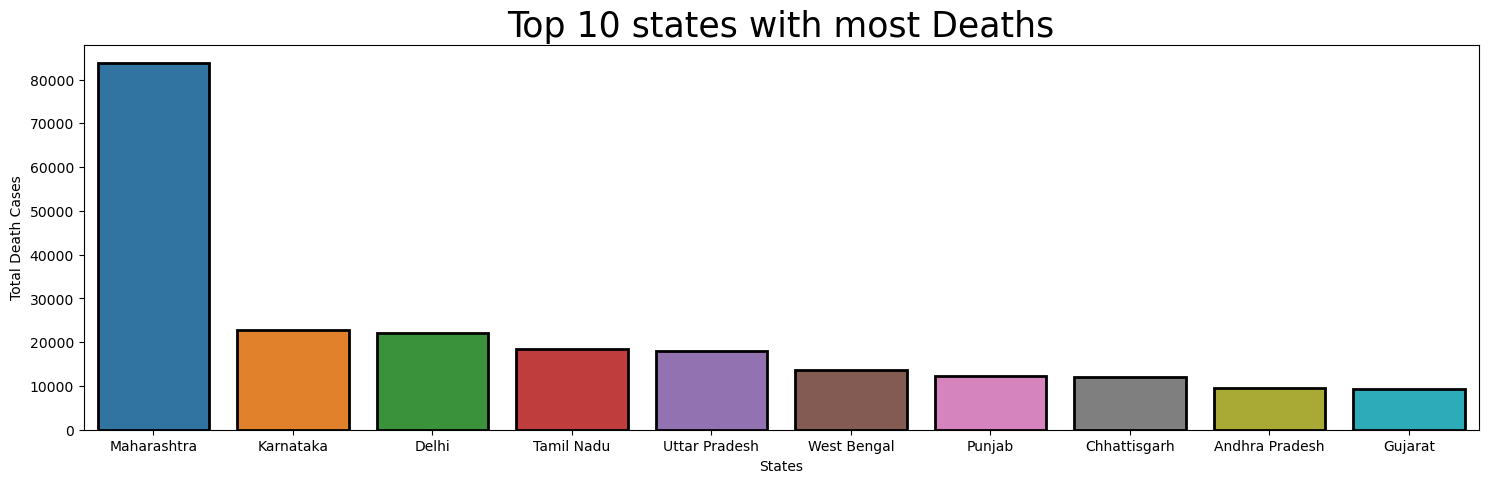

In [47]:
top_10_deaths = data_2.groupby(by='State/UnionTerritory').max()[["Deaths", "Date"]].sort_values(by="Deaths", ascending=False).reset_index()
fig = plt.figure(figsize=(18, 5))
plt.title("Top 10 states with most Deaths", size=25)
ax = sns.barplot(data=top_10_deaths.iloc[:10], y="Deaths", x="State/UnionTerritory", linewidth=2, edgecolor="black")
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()


### Growth trend

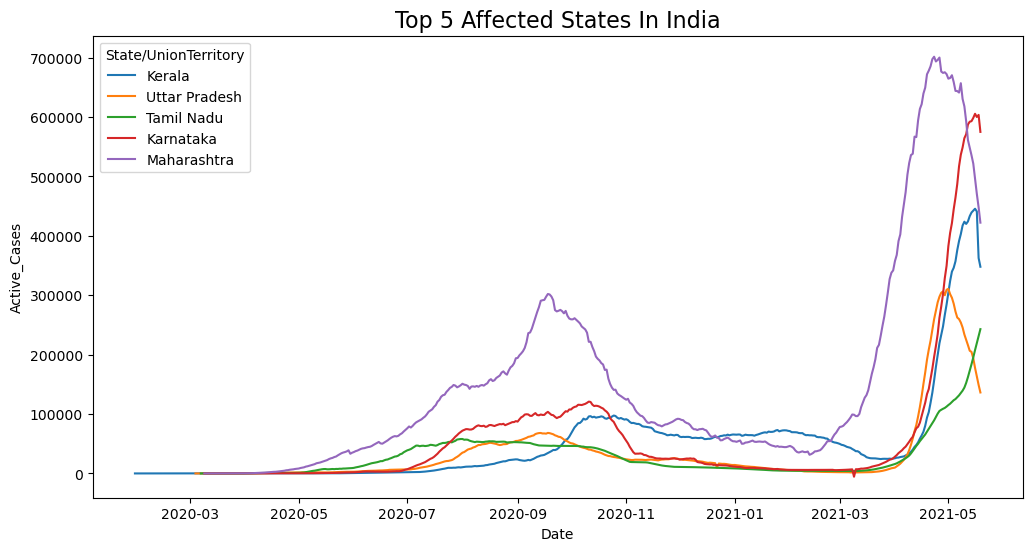

In [48]:
fig = plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=data_2[data_2['State/UnionTerritory'].isin(["Maharashtra", "Karnataka", "Kerala", "Tamil Nadu", "Uttar Pradesh"])], x="Date", y="Active_Cases", hue='State/UnionTerritory')
ax.set_title("Top 5 Affected States In India", size=16)
plt.show()

In [49]:
import pandas as pd
df = pd.read_csv("D:/Projects/DataAnalysis_Projects/Covid19_Exploratory_Data_Analysis/Covid19_Exploratory_Data_Analysis/Datasets/Covid19_Vaccination_India_Statewise.csv")
df.head()

Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

   Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2                               NaN  ...                               NaN   
3                               NaN  ...                               NaN   
4                               NaN  ...                               NaN   

   45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   

   18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   60+ Years(Individuals Vaccinated)  Male(Individuals Vaccinated)  \
0                                NaN                       23757.0   
1                                NaN                       27348.0   
2                                NaN                       41361.0   
3                                NaN                       81901.0   
4                                NaN                       98111.0   

   Female(Individuals Vaccinated)  Transgender(Individuals Vaccinated)  \
0                         24517.0                                  2.0   
1                         31252.0                                  4.0   
2                         58083.0                                  5.0   
3                        113613.0                                 11.0   
4                        153145.0                                 24.0   

   Total Individuals Vaccinated  
0                       48276.0  
1                       58604.0  
2                       99449.0  
3                      195525.0  
4                      251280.0  

[5 rows x 24 columns]

### change the column name from "Updated On" to "Vaccine_Date"

In [50]:
df.rename(columns={'Updated On': 'Vaccine_Date'}, inplace=True)

In [51]:
df

Vaccine_Date        State  Total Doses Administered  Sessions   Sites   \
0      16/01/2021        India                   48276.0    3455.0   2957.0   
1      17/01/2021        India                   58604.0    8532.0   4954.0   
2      18/01/2021        India                   99449.0   13611.0   6583.0   
3      19/01/2021        India                  195525.0   17855.0   7951.0   
4      20/01/2021        India                  251280.0   25472.0  10504.0   
...           ...          ...                       ...       ...      ...   
7840   11/08/2021  West Bengal                       NaN       NaN      NaN   
7841   12/08/2021  West Bengal                       NaN       NaN      NaN   
7842   13/08/2021  West Bengal                       NaN       NaN      NaN   
7843   14/08/2021  West Bengal                       NaN       NaN      NaN   
7844   15/08/2021  West Bengal                       NaN       NaN      NaN   

      First Dose Administered  Second Dose Administered  \
0                     48276.0                       0.0   
1                     58604.0                       0.0   
2                     99449.0                       0.0   
3                    195525.0                       0.0   
4                    251280.0                       0.0   
...                       ...                       ...   
7840                      NaN                       NaN   
7841                      NaN                       NaN   
7842                      NaN                       NaN   
7843                      NaN                       NaN   
7844                      NaN                       NaN   

      Male (Doses Administered)  Female (Doses Administered)  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   
...                         ...                          ...   
7840                        NaN                          NaN   
7841                        NaN                          NaN   
7842                        NaN                          NaN   
7843                        NaN                          NaN   
7844                        NaN                          NaN   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                                  NaN  ...                               NaN   
1                                  NaN  ...                               NaN   
2                                  NaN  ...                               NaN   
3                                  NaN  ...                               NaN   
4                                  NaN  ...                               NaN   
...                                ...  ...                               ...   
7840                               NaN  ...                               NaN   
7841                               NaN  ...                               NaN   
7842                               NaN  ...                               NaN   
7843                               NaN  ...                               NaN   
7844                               NaN  ...                               NaN   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                                  NaN                             NaN   
1                                  NaN                             NaN   
2                                  NaN                             NaN   
3                                  NaN                             NaN   
4                                  NaN                             NaN   
...                                ...                             ...   
7840                               NaN                             NaN   
7841         

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

### missing values on the DataFrame

In [53]:
df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [54]:
vaccination = df.drop(columns=['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'])

In [55]:
vaccination.head(3)

Vaccine_Date  State  Total Doses Administered  Sessions   Sites   \
0   16/01/2021  India                   48276.0    3455.0   2957.0   
1   17/01/2021  India                   58604.0    8532.0   4954.0   
2   18/01/2021  India                   99449.0   13611.0   6583.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   

   Transgender (Doses Administered)   Covaxin (Doses Administered)  \
0                               NaN                          579.0   
1                               NaN                          635.0   
2                               NaN                         1299.0   

   CoviShield (Doses Administered)  18-44 Years(Individuals Vaccinated)  \
0                          47697.0                                  NaN   
1                          57969.0                                  NaN   
2                          98150.0                                  NaN   

   45-60 Years(Individuals Vaccinated)  60+ Years(Individuals Vaccinated)  \
0                                  NaN                                NaN   
1                                  NaN                                NaN   
2                                  NaN                                NaN   

   Male(Individuals Vaccinated)  Female(Individuals Vaccinated)  \
0                       23757.0                         24517.0   
1                       27348.0                         31252.0   
2                       41361.0                         58083.0   

   Transgender(Individuals Vaccinated)  Total Individuals Vaccinated  
0                                  2.0                       48276.0  
1                                  4.0                       58604.0  
2                                  5.0                       99449.0

In [56]:
df.dropna(axis=0, how='any')  # Drop rows with any null values
df.dropna(axis=1, how='any')  # Drop columns with any null values

Vaccine_Date        State
0      16/01/2021        India
1      17/01/2021        India
2      18/01/2021        India
3      19/01/2021        India
4      20/01/2021        India
...           ...          ...
7840   11/08/2021  West Bengal
7841   12/08/2021  West Bengal
7842   13/08/2021  West Bengal
7843   14/08/2021  West Bengal
7844   15/08/2021  West Bengal

[7845 rows x 2 columns]

### Replace null values with zero

In [57]:
df.fillna(0)

Vaccine_Date        State  Total Doses Administered  Sessions   Sites   \
0      16/01/2021        India                   48276.0    3455.0   2957.0   
1      17/01/2021        India                   58604.0    8532.0   4954.0   
2      18/01/2021        India                   99449.0   13611.0   6583.0   
3      19/01/2021        India                  195525.0   17855.0   7951.0   
4      20/01/2021        India                  251280.0   25472.0  10504.0   
...           ...          ...                       ...       ...      ...   
7840   11/08/2021  West Bengal                       0.0       0.0      0.0   
7841   12/08/2021  West Bengal                       0.0       0.0      0.0   
7842   13/08/2021  West Bengal                       0.0       0.0      0.0   
7843   14/08/2021  West Bengal                       0.0       0.0      0.0   
7844   15/08/2021  West Bengal                       0.0       0.0      0.0   

      First Dose Administered  Second Dose Administered  \
0                     48276.0                       0.0   
1                     58604.0                       0.0   
2                     99449.0                       0.0   
3                    195525.0                       0.0   
4                    251280.0                       0.0   
...                       ...                       ...   
7840                      0.0                       0.0   
7841                      0.0                       0.0   
7842                      0.0                       0.0   
7843                      0.0                       0.0   
7844                      0.0                       0.0   

      Male (Doses Administered)  Female (Doses Administered)  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   
...                         ...                          ...   
7840                        0.0                          0.0   
7841                        0.0                          0.0   
7842                        0.0                          0.0   
7843                        0.0                          0.0   
7844                        0.0                          0.0   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                                  0.0  ...                               0.0   
1                                  0.0  ...                               0.0   
2                                  0.0  ...                               0.0   
3                                  0.0  ...                               0.0   
4                                  0.0  ...                               0.0   
...                                ...  ...                               ...   
7840                               0.0  ...                               0.0   
7841                               0.0  ...                               0.0   
7842                               0.0  ...                               0.0   
7843                               0.0  ...                               0.0   
7844                               0.0  ...                               0.0   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   
...                                ...                             ...   
7840                               0.0                             0.0   
7841         

### Male vs Female Vaccination


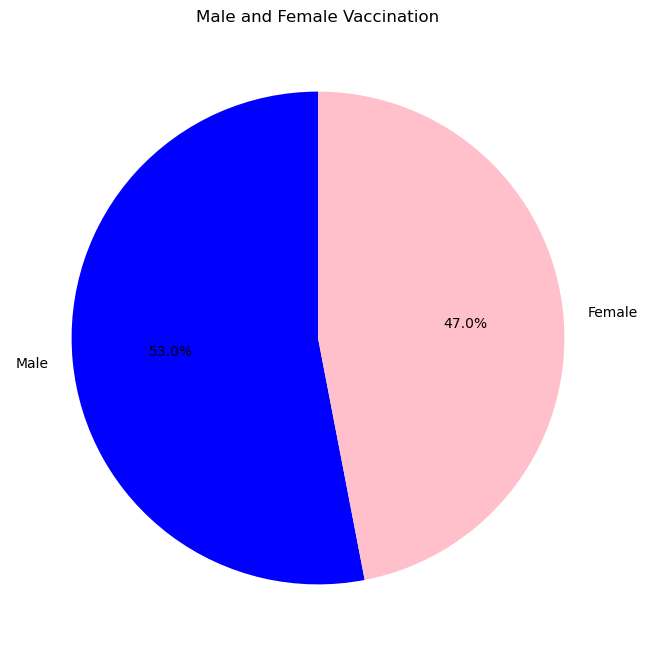

In [58]:
male_total = vaccination["Male(Individuals Vaccinated)"].sum()
female_total = vaccination["Female(Individuals Vaccinated)"].sum()

labels = ['Male', 'Female']
sizes = [male_total, female_total]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Male and Female Vaccination')
plt.show()

### Remove rows where state = India

In [59]:
vaccine = df[df.State != 'India']
vaccine

Vaccine_Date                        State  Total Doses Administered  \
212    16/01/2021  Andaman and Nicobar Islands                      23.0   
213    17/01/2021  Andaman and Nicobar Islands                      23.0   
214    18/01/2021  Andaman and Nicobar Islands                      42.0   
215    19/01/2021  Andaman and Nicobar Islands                      89.0   
216    20/01/2021  Andaman and Nicobar Islands                     124.0   
...           ...                          ...                       ...   
7840   11/08/2021                  West Bengal                       NaN   
7841   12/08/2021                  West Bengal                       NaN   
7842   13/08/2021                  West Bengal                       NaN   
7843   14/08/2021                  West Bengal                       NaN   
7844   15/08/2021                  West Bengal                       NaN   

      Sessions   Sites   First Dose Administered  Second Dose Administered  \
212        2.0      2.0                     23.0                       0.0   
213        2.0      2.0                     23.0                       0.0   
214        9.0      2.0                     42.0                       0.0   
215       12.0      2.0                     89.0                       0.0   
216       16.0      3.0                    124.0                       0.0   
...        ...      ...                      ...                       ...   
7840       NaN      NaN                      NaN                       NaN   
7841       NaN      NaN                      NaN                       NaN   
7842       NaN      NaN                      NaN                       NaN   
7843       NaN      NaN                      NaN                       NaN   
7844       NaN      NaN                      NaN                       NaN   

      Male (Doses Administered)  Female (Doses Administered)  \
212                        12.0                         11.0   
213                        12.0                         11.0   
214                        29.0                         13.0   
215                        53.0                         36.0   
216                        67.0                         57.0   
...                         ...                          ...   
7840                        NaN                          NaN   
7841                        NaN                          NaN   
7842                        NaN                          NaN   
7843                        NaN                          NaN   
7844                        NaN                          NaN   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
212                                0.0  ...                               NaN   
213                                0.0  ...                               NaN   
214                                0.0  ...                               NaN   
215                                0.0  ...                               NaN   
216                                0.0  ...                               NaN   
...                                ...  ...                               ...   
7840                               NaN  ...                               NaN   
7841                               NaN  ...                               NaN   
7842                               NaN  ...                               NaN   
7843                               NaN  ...                               NaN   
7844                               NaN  ...                               NaN   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
212                                NaN                             NaN   
213                                NaN                             NaN   
214                                NaN                             NaN   
215                                NaN                             NaN   
216                                NaN     

In [60]:
vaccine.rename(columns = {"Total Individuals Vaccinated": "Total"}, inplace = True)
vaccine.head()

C:\Users\baisram\AppData\Local\Temp\ipykernel_21364\563876675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine.rename(columns = {"Total Individuals Vaccinated": "Total"}, inplace = True)


Vaccine_Date                        State  Total Doses Administered  \
212   16/01/2021  Andaman and Nicobar Islands                      23.0   
213   17/01/2021  Andaman and Nicobar Islands                      23.0   
214   18/01/2021  Andaman and Nicobar Islands                      42.0   
215   19/01/2021  Andaman and Nicobar Islands                      89.0   
216   20/01/2021  Andaman and Nicobar Islands                     124.0   

     Sessions   Sites   First Dose Administered  Second Dose Administered  \
212       2.0      2.0                     23.0                       0.0   
213       2.0      2.0                     23.0                       0.0   
214       9.0      2.0                     42.0                       0.0   
215      12.0      2.0                     89.0                       0.0   
216      16.0      3.0                    124.0                       0.0   

     Male (Doses Administered)  Female (Doses Administered)  \
212                       12.0                         11.0   
213                       12.0                         11.0   
214                       29.0                         13.0   
215                       53.0                         36.0   
216                       67.0                         57.0   

     Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
212                               0.0  ...                               NaN   
213                               0.0  ...                               NaN   
214                               0.0  ...                               NaN   
215                               0.0  ...                               NaN   
216                               0.0  ...                               NaN   

     45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
212                               NaN                             NaN   
213                               NaN                             NaN   
214                               NaN                             NaN   
215                               NaN                             NaN   
216                               NaN                             NaN   

     18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
212                                  NaN                                  NaN   
213                                  NaN                                  NaN   
214                                  NaN                                  NaN   
215                                  NaN                                  NaN   
216                                  NaN                                  NaN   

     60+ Years(Individuals Vaccinated)  Male(Individuals Vaccinated)  \
212                                NaN                           NaN   
213                                NaN                           NaN   
214                                NaN                           NaN   
215                                NaN                           NaN   
216                                NaN                           NaN   

     Female(Individuals Vaccinated)  Transgender(Individuals Vaccinated)  \
212                             NaN                                  NaN   
213                             NaN                                  NaN   
214                             NaN                                  NaN   
215                             NaN                                  NaN   
216                             NaN                                  NaN   

     Total  
212   23.0  
213   23.0  
214   42.0  
215   89.0  
216  124.0  

[5 rows x 24 columns]

In [61]:
### Most vaccinated State

In [62]:
max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values(by='Total', ascending=False)[:5]
max_vac

Total
State                      
Maharashtra    1.403075e+09
Uttar Pradesh  1.200575e+09
Rajasthan      1.141163e+09
Gujarat        1.078261e+09
West Bengal    9.250227e+08

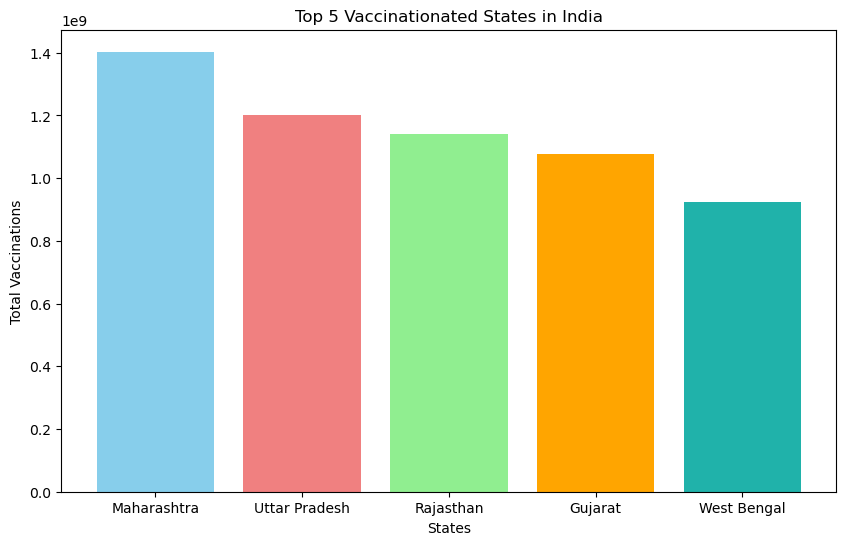

In [63]:
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightseagreen']
plt.figure(figsize=(10, 6))
plt.bar(max_vac.index, max_vac['Total'], color=colors)
plt.title('Top 5 Vaccinationated States in India')
plt.xlabel('States')
plt.ylabel('Total Vaccinations')
plt.show()

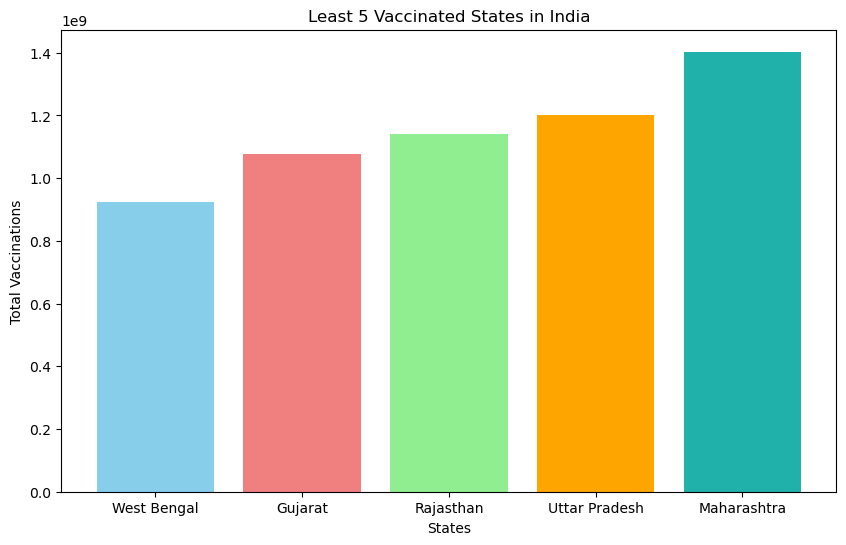

In [64]:
max_vac_sorted = max_vac.sort_values(by='Total', ascending=True)

least_5_states = max_vac_sorted.head(5)

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightseagreen']

plt.figure(figsize=(10, 6))
plt.bar(least_5_states.index, least_5_states['Total'], color=colors)
plt.title('Least 5 Vaccinated States in India')
plt.xlabel('States')
plt.ylabel('Total Vaccinations')
plt.show()

### Time Series Analysis

Convert 'Vaccine_Date' column to datetime 

### Convert 'Vaccine_Date' column name to datetime

In [65]:
df['Vaccine_Date'] = pd.to_datetime(df['Vaccine_Date'])

C:\Users\baisram\AppData\Local\Temp\ipykernel_21364\3285586149.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Vaccine_Date'] = pd.to_datetime(df['Vaccine_Date'])


### Set 'Vaccine_Date' as the index

To perform time series analysis, it's common to set the date column as the index of the DataFrame. This makes it easier to plot and analyze time-related trends.

In [66]:
df_time_series = df.set_index('Vaccine_Date')

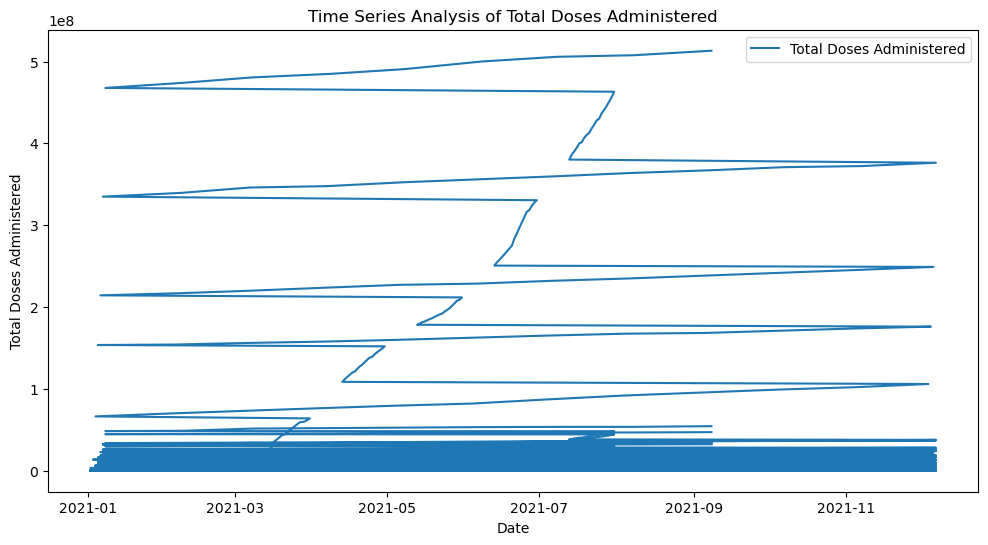

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['Total Doses Administered'], label='Total Doses Administered')
plt.title('Time Series Analysis of Total Doses Administered')
plt.xlabel('Date')
plt.ylabel('Total Doses Administered')
plt.legend()
plt.show()

### Vaccine Type Distribution:

Filter relevant columns for age group analysis

In [68]:
df_age_groups = df[['18-44 Years(Individuals Vaccinated)', '45-60 Years(Individuals Vaccinated)', '60+ Years(Individuals Vaccinated)']]

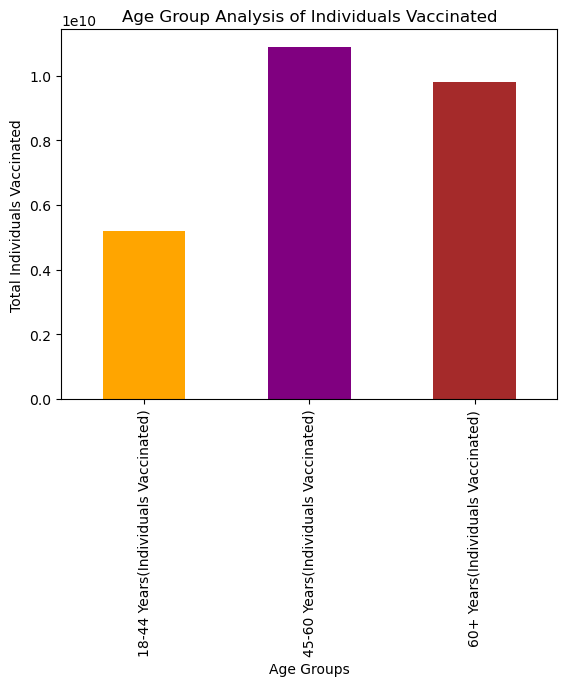

In [69]:
df_age_groups.sum().plot(kind='bar', color=['orange', 'purple', 'brown'])
plt.title('Age Group Analysis of Individuals Vaccinated')
plt.xlabel('Age Groups')
plt.ylabel('Total Individuals Vaccinated')
plt.show()


### State-wise Vaccination Rate

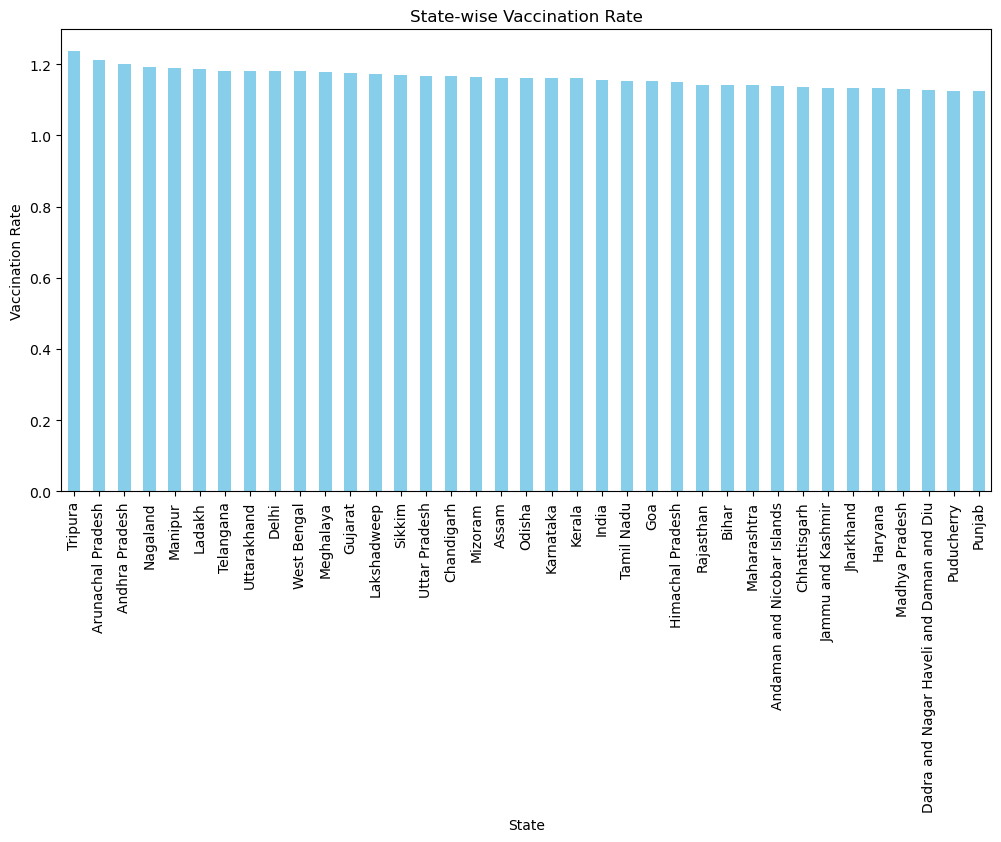

In [70]:
df['Vaccination Rate'] = df['Total Doses Administered'] / df['Total Individuals Vaccinated']

plt.figure(figsize=(12, 6))
df.groupby('State')['Vaccination Rate'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('State-wise Vaccination Rate')
plt.xlabel('State')
plt.ylabel('Vaccination Rate')
plt.show()

### Correlation Analysis

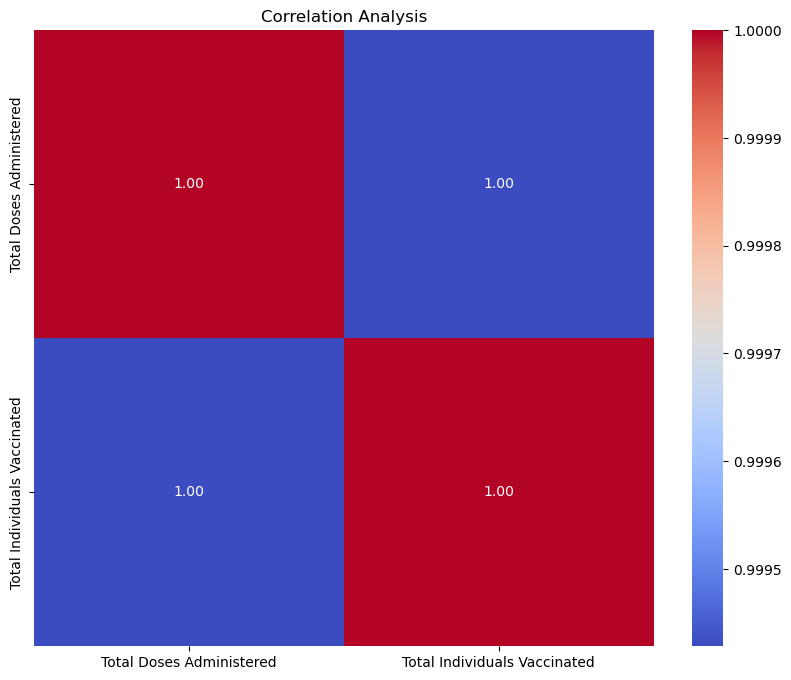

In [71]:
df_correlation = df[['Total Doses Administered', 'Total Individuals Vaccinated']]

correlation_matrix = df_correlation.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis')
plt.show()


### Creating Subplots

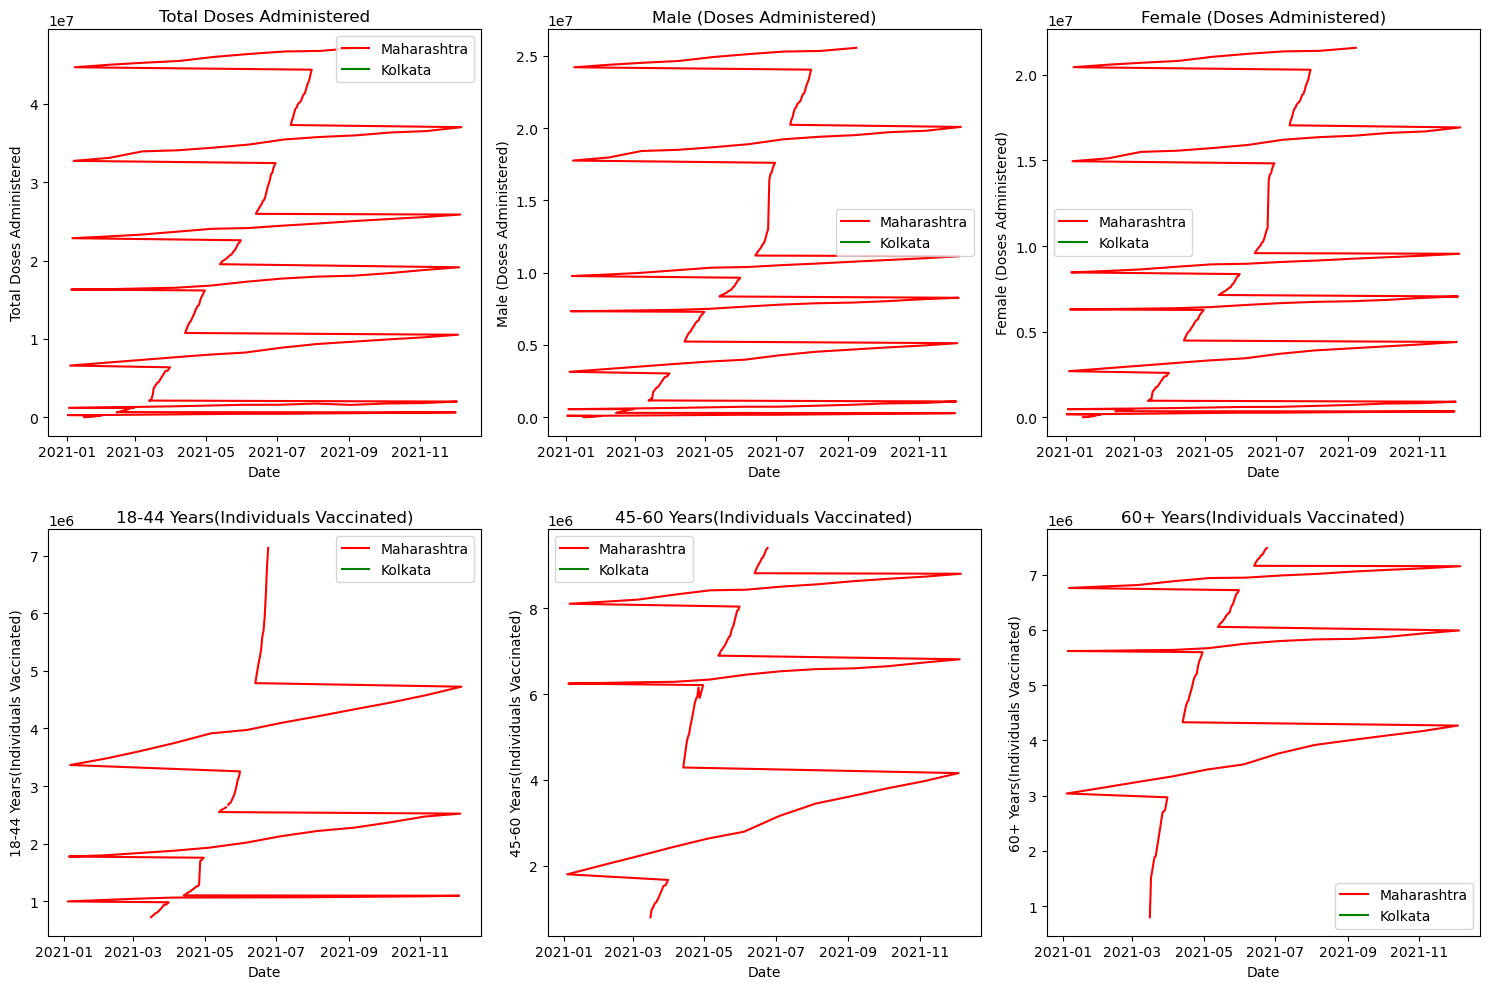

In [72]:
import matplotlib.pyplot as plt

states = ['Maharashtra', 'Kolkata']
filtered_data = df[df['State'].isin(states)]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

metrics = ['Total Doses Administered', 'Male (Doses Administered)', 'Female (Doses Administered)', '18-44 Years(Individuals Vaccinated)', '45-60 Years(Individuals Vaccinated)', '60+ Years(Individuals Vaccinated)']

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
labels = states

for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]
    for j, state in enumerate(states):
        state_data = filtered_data[filtered_data['State'] == state]
        ax.plot(state_data['Vaccine_Date'], state_data[metric], label=labels[j], color=colors[j])
        ax.set_title(metric)
        ax.set_xlabel('Date')
        ax.set_ylabel(metric)
        ax.legend()

plt.tight_layout()
plt.show()


### line plot

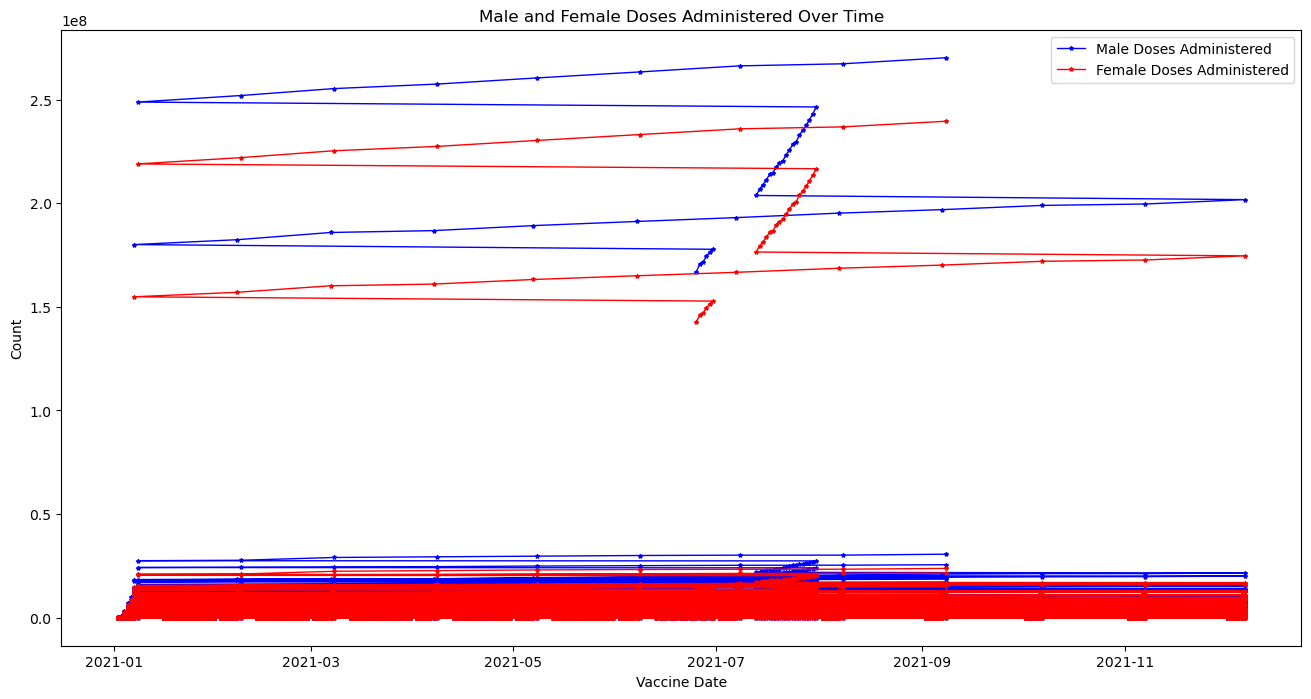

In [73]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided columns
vaccine_date = df['Vaccine_Date']
male_doses_administered = df['Male (Doses Administered)']
female_doses_administered = df['Female (Doses Administered)']

# Plotting
plt.figure(figsize=(16,8))

plt.plot(vaccine_date, male_doses_administered, color='blue', linewidth=1, label='Male Doses Administered', marker='*', markersize=3)
plt.plot(vaccine_date, female_doses_administered, color='red', linewidth=1, label='Female Doses Administered', marker='*', markersize=3)

plt.xlabel('Vaccine Date')
plt.ylabel('Count')
plt.title('Male and Female Doses Administered Over Time')

plt.legend()
plt.show()


### Line Plot with Markers

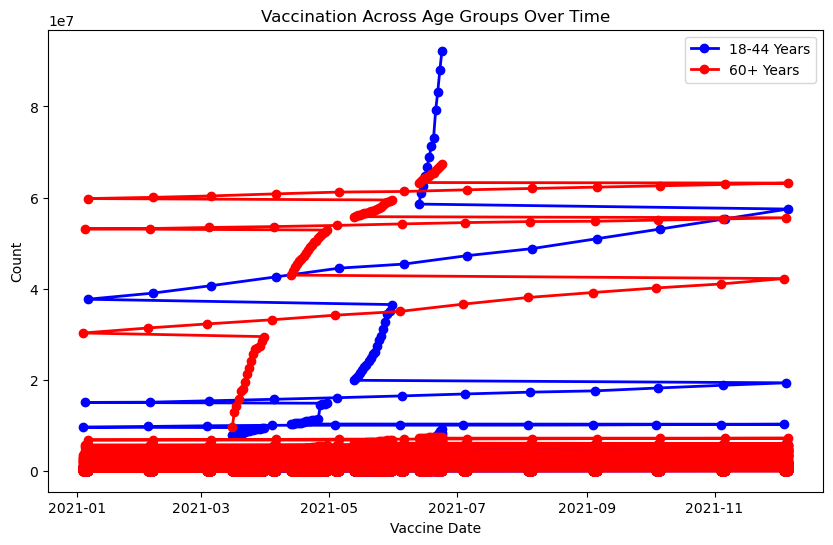

In [74]:
import matplotlib.pyplot as plt

vaccine_date = df['Vaccine_Date']
age_18_44 = df['18-44 Years(Individuals Vaccinated)']
age_60_plus = df['60+ Years(Individuals Vaccinated)']

plt.figure(figsize=(10, 6))

plt.plot(vaccine_date, age_18_44, color='blue', linewidth=2, label='18-44 Years', marker='o', markersize=6)
plt.plot(vaccine_date, age_60_plus, color='red', linewidth=2, label='60+ Years', marker='o', markersize=6)

plt.xlabel('Vaccine Date')
plt.ylabel('Count')
plt.title('Vaccination Across Age Groups Over Time')

plt.legend()
plt.show()

# opacity minimise and maximize

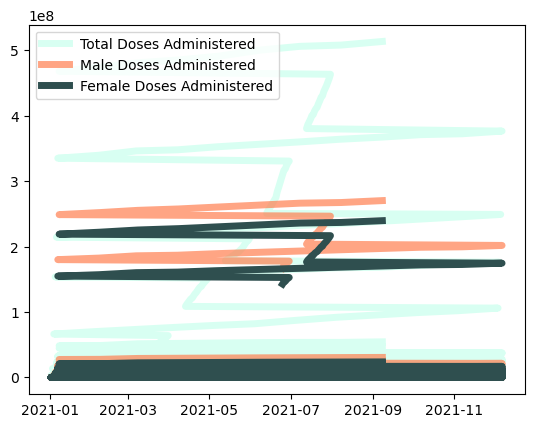

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the provided columns
x = df['Vaccine_Date']

# Choose three columns from your data for demonstration
column1 = df['Total Doses Administered']
column2 = df['Male (Doses Administered)']
column3 = df['Female (Doses Administered)']

# Plotting with different opacities
plt.plot(x, column1, color='Aquamarine', linewidth=5, alpha=0.3, label='Total Doses Administered')
plt.plot(x, column2, color='Coral', linewidth=5, alpha=0.7, label='Male Doses Administered')
plt.plot(x, column3, color='DarkSlateGrey', linewidth=5, alpha=1, label='Female Doses Administered')


plt.legend()
plt.show()


### Geospatial Analysis

C:\Users\baisram\AppData\Local\Temp\ipykernel_21364\2071359381.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


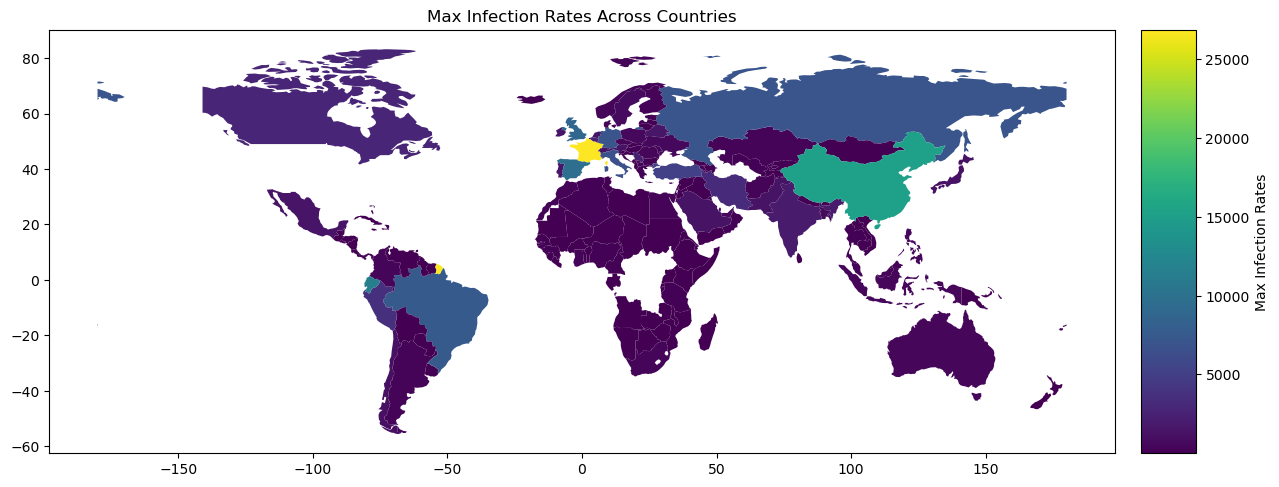

In [76]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(corona_dataset_aggregated, left_on='name', right_on='Country/Region')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='max_infection_rates', ax=ax, legend=True, cax=cax, legend_kwds={'label': "Max Infection Rates"})
ax.set_title('Max Infection Rates Across Countries')
plt.show()


### Time Series Forecasting

C:\Users\baisram\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\baisram\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\baisram\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\baisram\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


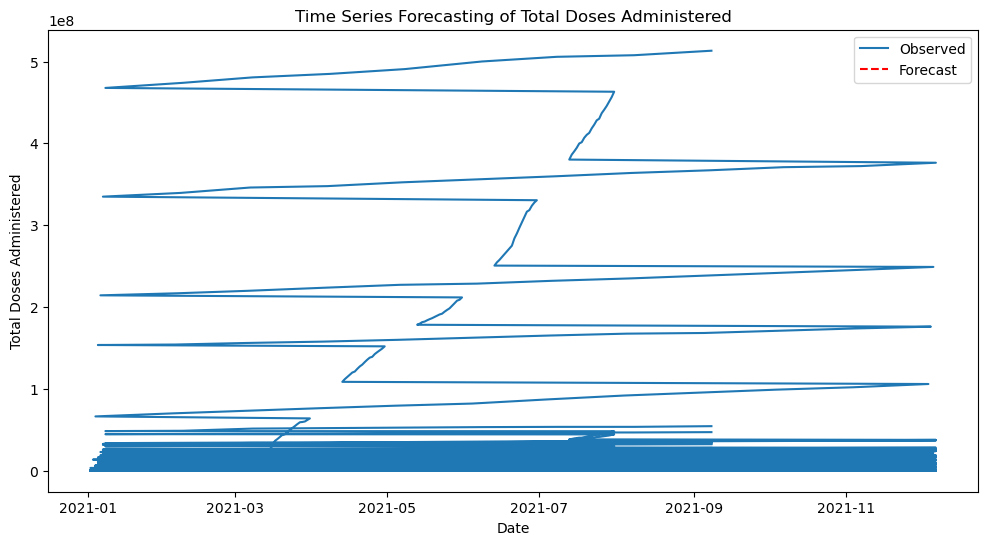

In [78]:
total_doses_series = df_time_series['Total Doses Administered']
model = ExponentialSmoothing(total_doses_series, trend='add', seasonal='add', seasonal_periods=7)
fit_model = model.fit()

forecast_periods = 30  
forecast_dates = [total_doses_series.index[-1] + timedelta(days=i) for i in range(1, forecast_periods + 1)]
forecast = fit_model.forecast(steps=forecast_periods)

plt.figure(figsize=(12, 6))
plt.plot(total_doses_series.index, total_doses_series, label='Observed')
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='dashed', color='red')
plt.title('Time Series Forecasting of Total Doses Administered')
plt.xlabel('Date')
plt.ylabel('Total Doses Administered')
plt.legend()
plt.show()

### Intractive Dashboard

In [95]:
import plotly.express as px

fig = px.line(df, x='Vaccine_Date', y='Total Doses Administered', color='State',
              title='Total Doses Administered Over Time by State',
              labels={'Total Doses Administered': 'Total Doses'})

fig.update_layout(updatemenus=[
    dict(
        type="buttons",
        direction="down",
        x=0.8,
        y=1.1,
        buttons=list([
            dict(label='All States',
                 method='relayout',
                 args=['xaxis', {'type': 'category', 'categoryorder': 'total ascending'}]),
            dict(label='Reset Zoom',
                 method='relayout',
                 args=['xaxis', 'reset']),
        ]),
    ),
])

fig.update_layout(xaxis=dict(type='category'))
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Total Doses Administered')

fig.show()